# Lab 5 
## Assignment 1: Data cleaning and merging, linear regression (1st and 2nd degree polynomial), log-scales, likelihood tests
## by Denis Khryashchev (dk2926)

In [1]:
# Importing libraries to open and store the data, statistics and plotting
import geopandas as gp
import pandas as pd
import os
import pylab as pl
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Allowing plotting inside the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Reading, cleaning and merging the data

In [2]:
# Reading Energy consumption data
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
print nrg[:5]

               NYC Borough, Block, and Lot (BBL) Co-reported BBL Status  \
Record Number                                                             
16099                                 4084010096                    NaN   
500                                   1005050001                    NaN   
5017                                  1021420100                    NaN   
5116                                  1021750080                    NaN   
363                                   1003360005                    NaN   

              BBLs Co-reported  \
Record Number                    
16099               4084010096   
500                 1005050001   
5017                1021420100   
5116                1021750080   
363                 1003360005   

              Reported NYC Building Identificaiton Numbers (BINs)  \
Record Number                                                       
16099                                                    4453435    
500                         

In [3]:
# Reading PLUTO data from the shapefile
bsize = gp.GeoDataFrame.from_file("MNMapPLUTO.shp")
print bsize[:10]

       APPBBL     APPDate                 Address AllZoning1 AllZoning2  \
0           0        None        39 MONROE STREET       R7-2       None   
1           0        None         53 GRAND STREET      M1-5A       None   
2           0        None        27 BARROW STREET       C2-6         R6   
3           0        None  327 AVENUE OF THE AMER  C1-5/R7-2       None   
4           0        None   30 GREAT JONES STREET      M1-5B       None   
5           0        None      316 WEST 78 STREET        R8B       None   
6           0        None         227 MOTT STREET    C6-2/LI       None   
7           0        None      120 EAST 13 STREET      C6-2A       None   
8  1001800016  12/30/1993           17 JAY STREET  C6-2A/TMU       None   
9           0        None              2 7 AVENUE       C2-6         R6   

  AreaSource  AssessLand  AssessTot         BBL  BldgArea  \
0          7       71524     200695  1002760020      4500   
1          7      260323     400401  1002280022     

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


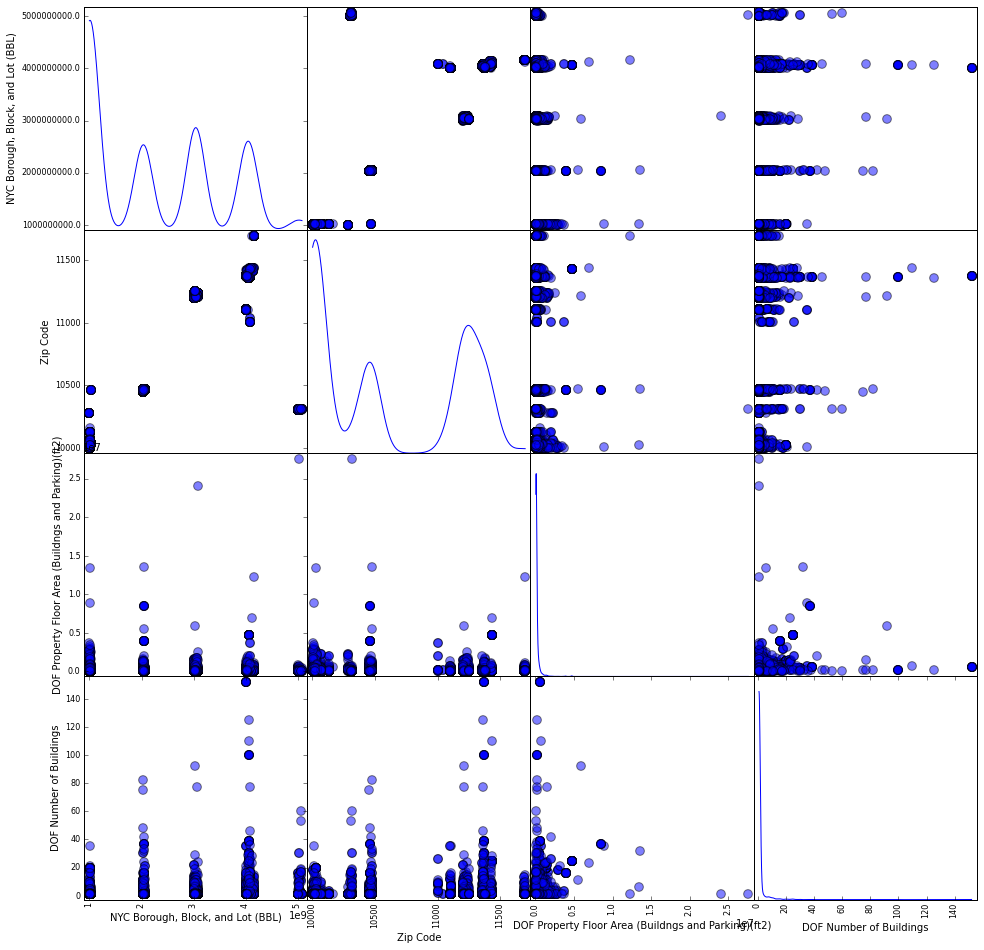

In [4]:
# Plotting all the plottable columns against each other in order to see if there are any patterns
scm = scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

In [5]:
# Creating the function that checks if the value can be converted into a float number, or not
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [6]:
#create the indeces array here
#indx = ...
# Creating the indeces array
ind_SEUI=(np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)'])) 
nrg['Site EUI(kBtu/ft2)'][~ind_SEUI]=float('NaN')

ind_TGE=(np.vectorize(canconvert)(nrg['Total GHG Emissions(MtCO2e)'])) 
nrg['Total GHG Emissions(MtCO2e)'][~ind_TGE]=float('NaN')

ind_DGE=(np.vectorize(canconvert)(nrg['Direct GHG Emissions(MtCO2e)'])) 
nrg['Direct GHG Emissions(MtCO2e)'][~ind_DGE]=float('NaN')

ind_IGE=(np.vectorize(canconvert)(nrg['Indirect GHG Emissions(MtCO2e)'])) 
nrg['Indirect GHG Emissions(MtCO2e)'][~ind_TGE]=float('NaN')

ind_DPFA=(np.vectorize(canconvert)(nrg['DOF Property Floor Area (Buildngs and Parking)(ft2)'])) 
nrg['DOF Property Floor Area (Buildngs and Parking)(ft2)'][~ind_DPFA]=float('NaN')

ind_RPFA=( np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)']))
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~ind_RPFA]=float('NaN')


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the docum

In [7]:
# Printing the results of the cleaning and replacing erroneous values with a NaN value
print nrg['Site EUI(kBtu/ft2)'].astype(float)
print nrg['Total GHG Emissions(MtCO2e)'].astype(float)
print nrg['Direct GHG Emissions(MtCO2e)'].astype(float)
print nrg['Indirect GHG Emissions(MtCO2e)'].astype(float)
print nrg['DOF Property Floor Area (Buildngs and Parking)(ft2)'].astype(float)
print nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
print bsize.BBL.astype(float)

Record Number
16099      180.5
500         82.1
5017       137.7
5116       103.2
363         74.0
6876        36.4
10714      114.8
1214       130.0
1544       138.3
1905     56909.0
2301        88.2
15059       15.7
674          NaN
2537        85.7
2841       195.7
2945        79.1
15120      144.1
3053       200.9
4233       104.6
4777        86.7
4912       102.1
5210        21.2
5295        78.3
1575         NaN
15025       55.2
4208        83.2
4799       145.1
1568        59.4
5427        88.7
5476       100.8
          ...   
14559        NaN
14560        NaN
14748        NaN
14753        NaN
13582        NaN
13947        NaN
14777        NaN
14779        NaN
14409        NaN
13262        NaN
13261        NaN
12523        NaN
12529        NaN
12536        NaN
13929        NaN
13944        NaN
13945        NaN
13821        NaN
13829        NaN
13837        NaN
13838        NaN
13847        NaN
14352        NaN
12976        NaN
12978        NaN
12984        NaN
12987        NaN


In [8]:
# Creating a merge of the nrg and the pluto datasets using a common column 'BBL'
#nrg['BBL'] = ...
#bblnrgdata = pd.merge(.....)
# New 'BBL' column
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)'] 
bblnrgdata = pd.merge(nrg, bsize, how='inner', on=['BBL'])
print bblnrgdata.columns

C:\Anaconda\lib\site-packages\pandas\core\index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
C:\Anaconda\lib\site-packages\pandas\core\index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


Index([                  u'NYC Borough, Block, and Lot (BBL)',
                                    u'Co-reported BBL Status',
                                          u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
                                             u'Street Number',
                                               u'Street Name',
                                                 u'Borough_x',
                                                  u'Zip Code',
                        u'DOF Benchmarking Submission Status',
                                        u'Site EUI(kBtu/ft2)', 
       ...
                                                u'YearAlter2',
                                                 u'YearBuilt',
                                                    u'ZMCode',
                                                   u'ZipCode',
                                                 u'ZoneDist1',
                                           

In [9]:
# Creating additional column for the total energy, multiplying the area by the energy per square ft
bblnrgdata['Energy_Total'] = bblnrgdata['Site EUI(kBtu/ft2)'].astype(float)*bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
print bblnrgdata['Energy_Total'].astype(float), bblnrgdata['Site EUI(kBtu/ft2)'].astype(float), bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)

0       1.932388e+07
1       8.923786e+06
2       6.484985e+06
3       7.252000e+06
4       2.657421e+07
5       8.313213e+06
6       2.606125e+10
7       4.507029e+07
8       8.861394e+05
9                NaN
10      6.721880e+06
11      1.571334e+07
12      8.304709e+06
13      7.611074e+07
14      8.857581e+07
15      7.286018e+06
16      5.401410e+06
17      6.619960e+06
18      1.715440e+06
19      4.870652e+06
20               NaN
21      3.643200e+06
22      4.235712e+07
23      8.150267e+06
24      4.539942e+06
25      4.937273e+06
26      4.323671e+07
27               NaN
28      1.368137e+07
29               NaN
            ...     
6515             NaN
6516             NaN
6517             NaN
6518             NaN
6519             NaN
6520             NaN
6521             NaN
6522             NaN
6523             NaN
6524             NaN
6525             NaN
6526             NaN
6527             NaN
6528             NaN
6529             NaN
6530             NaN
6531         

C:\Anaconda\lib\site-packages\pandas\core\index.py:1572: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(_values_from_object(key))


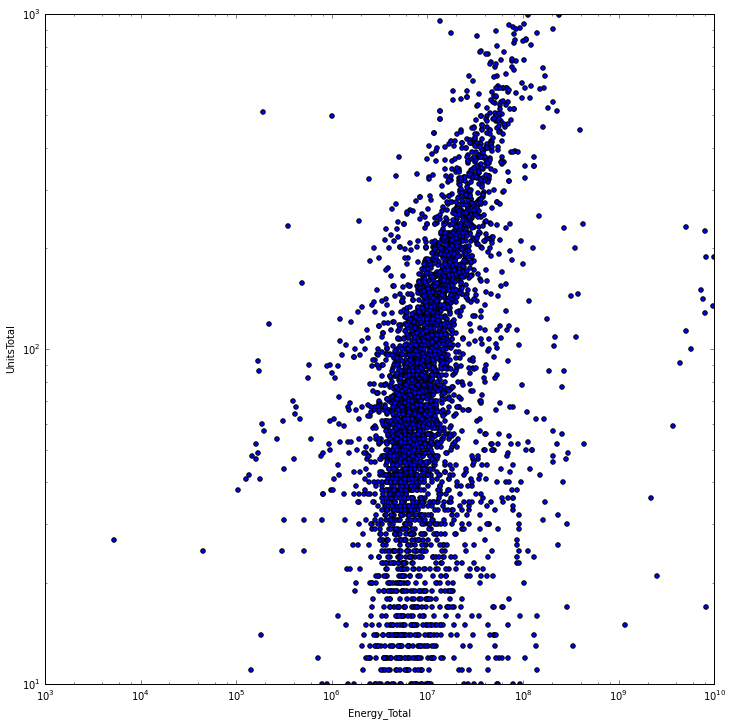

In [10]:
# Cutting the dataset
bblnrgdata_cut = bblnrgdata[(bblnrgdata.Energy_Total > 1e3) & (bblnrgdata.Energy_Total < 1e10) & (bblnrgdata.UnitsTotal>=10) & (bblnrgdata.UnitsTotal<1000)]
plot1 = bblnrgdata_cut.plot(kind='scatter',x='Energy_Total',y='UnitsTotal', marker='o',  figsize=(12, 12), loglog=True, xlim=(1e3,1e10), ylim=(1e1,1e3))

## 2. Building OLS models for (a) Enegry Total vs Units Total, (b) Units Total vs Energy Total + answering the first questions

In [11]:
# Building the least squares regression model (a) Energy Total vs Units Total
#X = sm.add_constant(np.log10(x))
#print X
#model = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires where x or y is NaN
#fit = model.fit()
#return fit.params[1], fit.params[0], fit # could also return stderr in each via fit.bse
nrg_model = sm.OLS(np.log10(bblnrgdata_cut['Energy_Total']), sm.add_constant(np.log10(bblnrgdata_cut['UnitsTotal'])), missing='drop')
nrg_fit = nrg_model.fit()
print nrg_fit.summary()

                            OLS Regression Results                            
Dep. Variable:           Energy_Total   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     907.8
Date:                Mon, 19 Oct 2015   Prob (F-statistic):          7.05e-181
Time:                        00:52:29   Log-Likelihood:                -2151.1
No. Observations:                4239   AIC:                             4306.
Df Residuals:                    4237   BIC:                             4319.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.1362      0.030    205.065      0.0

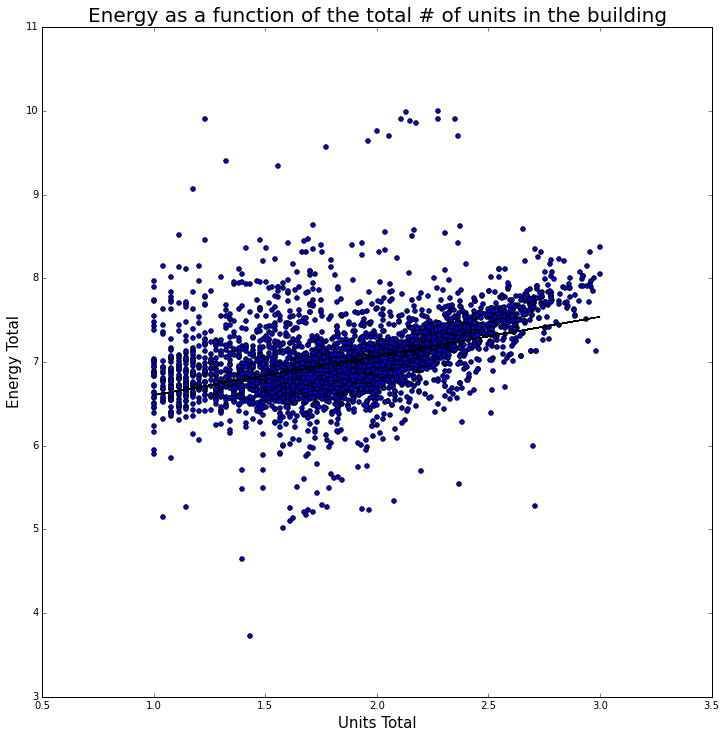

In [12]:
# Setting UnitsTotal as X, Energy_Total as Y, Plotting the regression line
pl.figure(figsize=(12, 12))
pl.ylabel('Energy Total', fontsize=15)
pl.xlabel('Units Total', fontsize=15)
pl.title('Energy as a function of the total # of units in the building', fontsize=20)
pl.scatter(np.log10(bblnrgdata_cut['UnitsTotal']), np.log10(bblnrgdata_cut['Energy_Total']))
plot2 = plot(np.log10(bblnrgdata_cut['UnitsTotal']), nrg_fit.predict(), 'k')

In [13]:
# Building the least squares regression model (b) Units Total vs Energy Total
#X = sm.add_constant(np.log10(x))
#print X
#model = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires where x or y is NaN
#fit = model.fit()
#return fit.params[1], fit.params[0], fit # could also return stderr in each via fit.bse
units_model = sm.OLS(np.log10(bblnrgdata_cut['UnitsTotal']), sm.add_constant(np.log10(bblnrgdata_cut['Energy_Total'])), missing='drop')
units_fit = units_model.fit()
print units_fit.summary()

                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     907.8
Date:                Mon, 19 Oct 2015   Prob (F-statistic):          7.05e-181
Time:                        00:52:29   Log-Likelihood:                -1692.9
No. Observations:                4239   AIC:                             3390.
Df Residuals:                    4237   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -0.7612      0.088     -8.650   

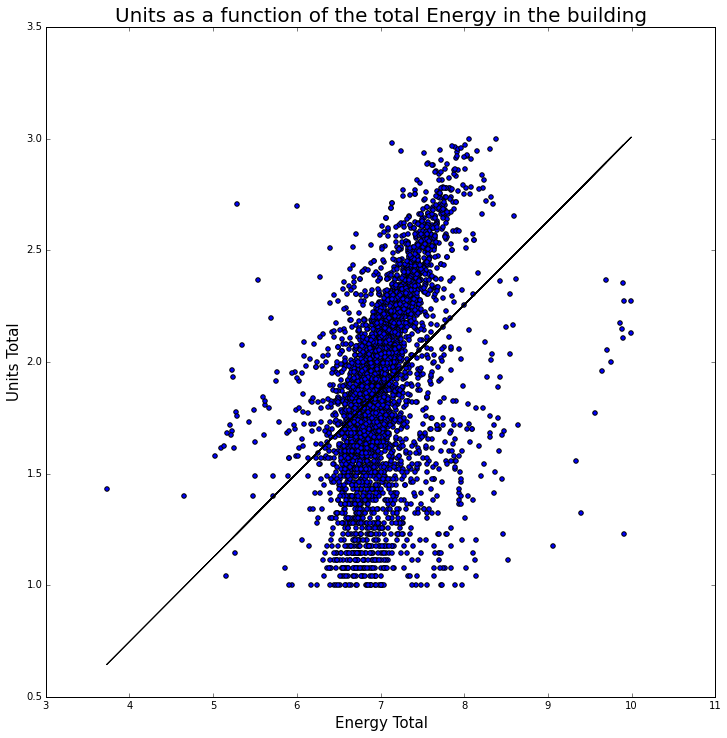

In [14]:
# Setting Energy Total as X, UnitsTotal as Y, Plotting the regression line
pl.figure(figsize=(12, 12))
pl.ylabel('Units Total', fontsize=15)
pl.xlabel('Energy Total', fontsize=15)
pl.title('Units as a function of the total Energy in the building', fontsize=20)
pl.scatter(np.log10(bblnrgdata_cut['Energy_Total']), np.log10(bblnrgdata_cut['UnitsTotal']))
plot3 = plot(np.log10(bblnrgdata_cut['Energy_Total']), units_fit.predict(), 'k')

### 1. The first model is better (nrg_model, Energy as a function of units), because we can have a wider variety of values of the units and it returns more pairs Units-Energy, while the second model (units_model, Units as a function of Energy) is worse, because it returns a narrow range of Energy-Units pairs. 
### 2. According to the summary, both models have the same Adjusted R-squared values (0.176), meaning that both models explain 17.6% of the data. The ratios for the 95% confidense intervals for both models are similar. Therefore, according to the summary, they are of the same accuracy.
### 3. Likelihood ratio-test is inappropriate for our case, because it is useful by definition to compare two nested models, which are often have various degrees of freedom. In our case the models are not nested and have the same degree of freedom.

## 3.Two second degree curve models (a) np.polyfit , (b) statsmodels.formula.api

In [15]:
# Calculating the coefficients for ax^2 + bx + c for Model (a)
a, b, c = np.polyfit(np.log10(bblnrgdata_cut['UnitsTotal']), np.log10(bblnrgdata_cut['Energy_Total']), 2)
print "a = %s, b = %s, c = %s" % (a, b, c)

a = 0.553905186174, b = -1.63641345586, c = 8.04739049031


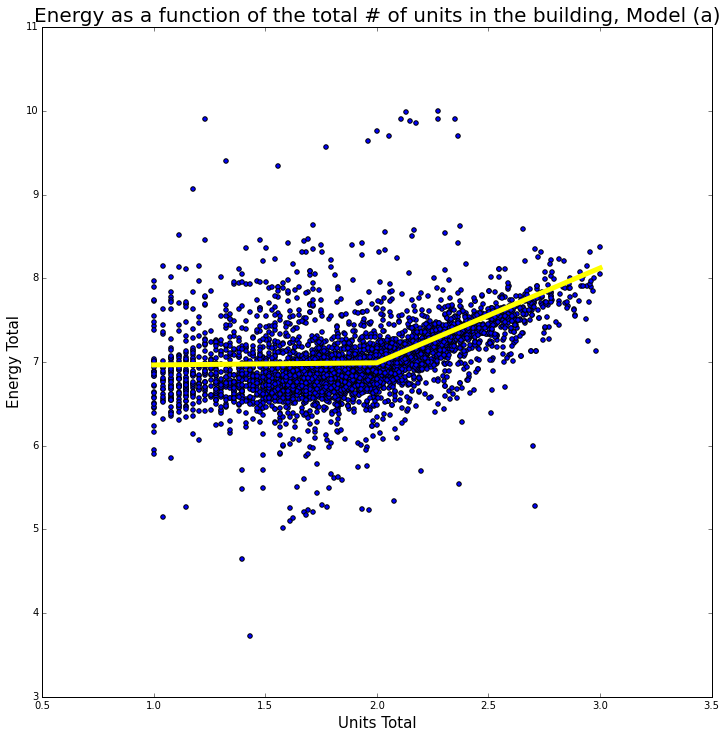

In [16]:
# Plotting the curve for Model (a)
x = np.arange(1,4)
y = a*x**2 + b*x + c
pl.figure(figsize=(12, 12))
pl.title('Energy as a function of the total # of units in the building, Model (a)', fontsize=20)
pl.xlabel('Units Total', fontsize = 15)
pl.ylabel('Energy Total', fontsize = 15)
pl.scatter(np.log10(bblnrgdata_cut['UnitsTotal']) ,np.log10(bblnrgdata_cut['Energy_Total']))
plot4 = pl.plot(x, y, 'k', color = "Yellow", linewidth = 5.0)

In [17]:
# Building Model (b), using statsmodels.formula.api
bblnrgdata_cut['UT_Log'] = bblnrgdata_cut['UnitsTotal'].apply(log10)
bblnrgdata_cut['ET_log'] = bblnrgdata_cut['Energy_Total'].apply(log10)

sec_model = smf.ols(formula='ET_log ~ 1 + UT_Log + I(UT_Log**2)', data = bblnrgdata_cut)
sec_fit = sec_model.fit()
sec_fit.summary()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ET_log   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     691.2
Date:                Mon, 19 Oct 2015   Prob (F-statistic):          1.64e-260
Time:                        00:52:30   Log-Likelihood:                -1964.0
No. Observations:                4239   AIC:                             3934.
Df Residuals:                    4236   BIC:                             3953.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          8.0474      0.101     79.831      0.000         7.850     8.245
UT_Log            -1.6364      0.107    -15.228      0.000        -1.847    -1.426
I(UT_Log ** 2)     0.5539      0.028     19.774      0.000         0.499     0.609
==============================================================================
Omnibus:                     1569.621   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31966.060
Skew:                           1.259   Prob(JB):                         0.00
Kurtosis:                      16.215   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

a= 0.553905186174, b= -1.63641345586, c= 8.04739049031 


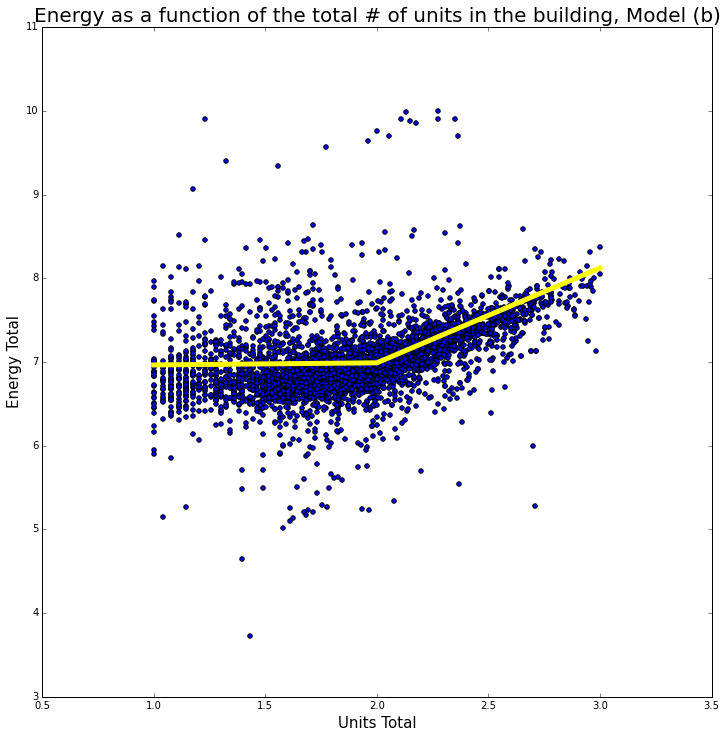

In [18]:
# Extracting the coefficients for the Model (b) and plotting the line
a, b, c = sec_fit.params[2], sec_fit.params[1], sec_fit.params[0]
print "a= %s, b= %s, c= %s "%(a, b, c)
x = np.arange(1,4)
y = a*x**2 + b*x + c
pl.figure(figsize=(12, 12))
pl.title('Energy as a function of the total # of units in the building, Model (b)', fontsize=20)
pl.xlabel('Units Total', fontsize = 15)
pl.ylabel('Energy Total', fontsize = 15)
pl.scatter(bblnrgdata_cut['UT_Log'],bblnrgdata_cut['ET_log'])
plot5 = pl.plot(x, y, 'k', color = "Yellow", linewidth = 5.0)

### 1. The models (a) np.polyfit and (b) statsmodels.formula.api returned the same exact values for the regression lines:
### (a) a = 0.553905186174, b = -1.63641345586, c = 8.04739049031
### (b) a = 0.553905186174, b = -1.63641345586, c = 8.04739049031
### That means that both models are identical. 
### 2. Comparing the second degree models to the 1 degree ones, we can definitely say that the second degree models are better, because the Adjusted R-squared value for the second degree is significantly bigger (0.246) than that of the one degree model (0.176), which means that the second degree models can explain more, 24.6% of the data.
### 3. We can do a likelihood ratio-test, because our second degree model is a nested one degree model. Number of degrees is different.

## 4. Extra credit. WLS model

In [20]:
# Building a WLS model with the weighted sq ft. Weights used: 1/sqrt
# wls_model = sm.WLS(np.log10(bblnrgdata_cut['Energy_Total']), sm.add_constant(np.log10(bblnrgdata_cut['UnitsTotal'])), weights=sqrt(1/bblnrgdata_cut['Reported Property Floor Area (Building(s)) (ft²)']))
# wls_fit = wls_model.fit()
# print wls_fit.summary()

# Building a WLS model with the weighted energy. Weights used: 1/sqrt
wls_model = sm.WLS(np.log10(bblnrgdata_cut['Energy_Total']), sm.add_constant(np.log10(bblnrgdata_cut['UnitsTotal'])), weights=sqrt(1/np.log10(bblnrgdata_cut['Energy_Total'])))
wls_fit = wls_model.fit()
print wls_fit.summary()


                            WLS Regression Results                            
Dep. Variable:           Energy_Total   R-squared:                       0.179
Model:                            WLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     922.4
Date:                Mon, 19 Oct 2015   Prob (F-statistic):          1.72e-183
Time:                        00:53:51   Log-Likelihood:                -2114.7
No. Observations:                4239   AIC:                             4233.
Df Residuals:                    4237   BIC:                             4246.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.1206      0.030    205.765      0.0

## 5. Extra credit
### Building an insightful plot to show the structure in the data

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Anaconda\lib\site-packages\ipykern

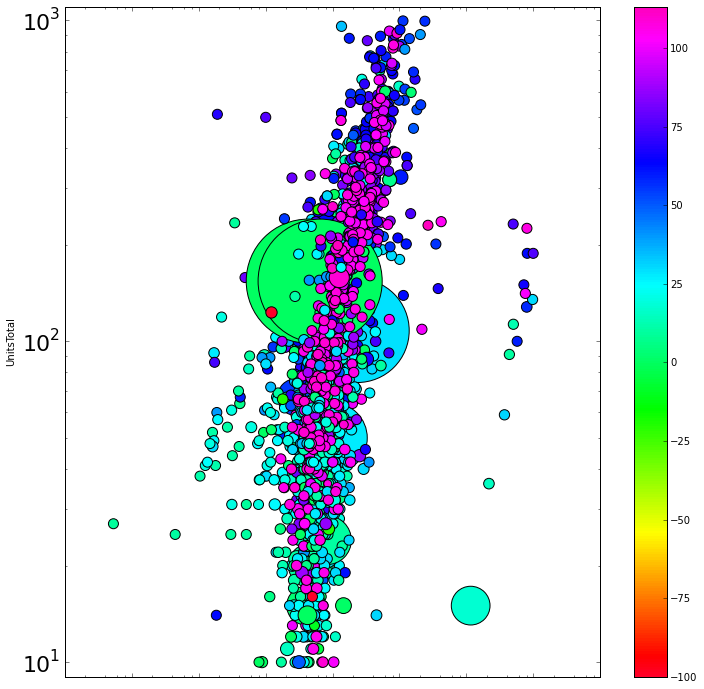

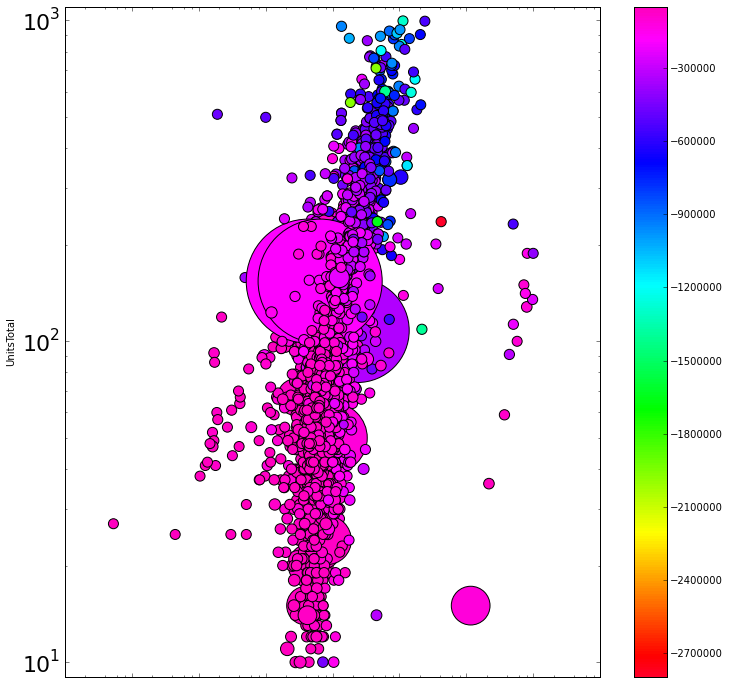

In [21]:
# Showing if there are any patterns involving the year the building was built
bblnrgdata_cut['YearBuilt'][bblnrgdata_cut['YearBuilt']<1800]=1800
plot7 = bblnrgdata_cut.plot(kind='scatter',x='Energy_Total',y='UnitsTotal', fontsize=22, colormap='gist_rainbow', alpha = 1, marker='o',  figsize=(12, 12), loglog=True,  xlim=(1000,1e11), ylim=(0.9e1,1.1e3), c=bblnrgdata_cut['YearBuilt']-1900, s=bblnrgdata_cut['UnitsTotal']/bblnrgdata_cut['UnitsRes']*100)

# Showing if there are any patterns involving the relation of the area of the appartment and the total area, including the parking
bblnrgdata_cut['Reported Property Floor Area (Building(s)) (ft²)']=bblnrgdata_cut['Reported Property Floor Area (Building(s)) (ft²)']>0
plot8 = bblnrgdata_cut.plot(kind='scatter',x='Energy_Total',y='UnitsTotal', fontsize=22, colormap='gist_rainbow', alpha = 1, marker='o',  figsize=(12, 12), loglog=True,  xlim=(1000,1e11), ylim=(0.9e1,1.1e3), c=bblnrgdata_cut['Reported Property Floor Area (Building(s)) (ft²)']-bblnrgdata_cut['DOF Property Floor Area (Buildngs and Parking)(ft2)'], s=bblnrgdata_cut['UnitsTotal']/bblnrgdata_cut['UnitsRes']*100)